In [103]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Read into the sugar dataset

In [104]:
df_sugar = pd.read_csv ('../data/psd_sugar.csv')

In [105]:
df_sugar.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0
1,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60
2,612000,"Sugar, Centrifugal",AF,Afghanistan,1975,1974,0,139,Human Dom. Consumption,8,(1000 MT),60
3,612000,"Sugar, Centrifugal",AF,Afghanistan,1976,1975,0,139,Human Dom. Consumption,8,(1000 MT),55
4,612000,"Sugar, Centrifugal",AF,Afghanistan,1977,1976,0,139,Human Dom. Consumption,8,(1000 MT),60


## drop columns

In [106]:
df_sugar = df_sugar.drop(columns = {'Commodity_Code', 'Calendar_Year', 'Month', 'Attribute_ID', 'Unit_ID'})

In [107]:
df_sugar

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value
0,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),0
1,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60
2,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),60
3,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),55
4,"Sugar, Centrifugal",AF,Afghanistan,1977,Human Dom. Consumption,(1000 MT),60
...,...,...,...,...,...,...,...
8668,"Sugar, Centrifugal",RH,Zimbabwe,2017,Human Dom. Consumption,(1000 MT),343
8669,"Sugar, Centrifugal",RH,Zimbabwe,2018,Human Dom. Consumption,(1000 MT),330
8670,"Sugar, Centrifugal",RH,Zimbabwe,2019,Human Dom. Consumption,(1000 MT),397
8671,"Sugar, Centrifugal",RH,Zimbabwe,2020,Human Dom. Consumption,(1000 MT),350


In [108]:
df_sugar_USA = df_sugar[df_sugar['Country_Name'] == 'United States']
df_sugar_USA.sort_values(by = ['Market_Year']).head(50)

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value
8170,"Sugar, Centrifugal",US,United States,1960,Human Dom. Consumption,(1000 MT),8671
8171,"Sugar, Centrifugal",US,United States,1961,Human Dom. Consumption,(1000 MT),8868
8172,"Sugar, Centrifugal",US,United States,1962,Human Dom. Consumption,(1000 MT),9106
8173,"Sugar, Centrifugal",US,United States,1963,Human Dom. Consumption,(1000 MT),9150
8174,"Sugar, Centrifugal",US,United States,1964,Human Dom. Consumption,(1000 MT),9194
8175,"Sugar, Centrifugal",US,United States,1965,Human Dom. Consumption,(1000 MT),9253
8176,"Sugar, Centrifugal",US,United States,1966,Human Dom. Consumption,(1000 MT),9589
8177,"Sugar, Centrifugal",US,United States,1967,Human Dom. Consumption,(1000 MT),9535
8178,"Sugar, Centrifugal",US,United States,1968,Human Dom. Consumption,(1000 MT),9535
8179,"Sugar, Centrifugal",US,United States,1969,Human Dom. Consumption,(1000 MT),9716


In [109]:
df_sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8673 entries, 0 to 8672
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Commodity_Description  8673 non-null   object
 1   Country_Code           8624 non-null   object
 2   Country_Name           8673 non-null   object
 3   Market_Year            8673 non-null   int64 
 4   Attribute_Description  8673 non-null   object
 5   Unit_Description       8673 non-null   object
 6   Value                  8673 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 474.4+ KB


## convert Value in 1000MT to Pounds

In [110]:
df_sugar['Value_grams'] = df_sugar['Value']* 1e+6
df_sugar.head()

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams
0,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),0,0.0
1,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60,60000000.0
2,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),60,60000000.0
3,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),55,55000000.0
4,"Sugar, Centrifugal",AF,Afghanistan,1977,Human Dom. Consumption,(1000 MT),60,60000000.0


## Read into the population dataset

In [111]:
df_pop = pd.read_csv ('../data/population_clean_1972.csv')
df_pop

,Country Name,Country Code,Years,population
0,Afghanistan,AFG,2020,38928341.0
1,Afghanistan,AFG,2019,38041754.0
2,Afghanistan,AFG,2018,37172386.0
3,Afghanistan,AFG,2017,36296400.0
4,Afghanistan,AFG,2016,35383128.0
...,...,...,...,...
11559,Zimbabwe,ZWE,1976,6502569.0
11560,Zimbabwe,ZWE,1975,6293875.0
11561,Zimbabwe,ZWE,1974,6085074.0
11562,Zimbabwe,ZWE,1973,5877726.0


In [112]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11564 entries, 0 to 11563
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11564 non-null  object 
 1   Country Code  11564 non-null  object 
 2   Years         11564 non-null  int64  
 3   population    11564 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 361.5+ KB


## country with the highest population

In [113]:
df_pop.sort_values(by = 'population', ascending=False)

,Country Name,Country Code,Years,population
11368,World,WLD,2020,7.794799e+09
11369,World,WLD,2019,7.673534e+09
11370,World,WLD,2018,7.591945e+09
11371,World,WLD,2017,7.509074e+09
11372,World,WLD,2016,7.424286e+09
...,...,...,...,...
9200,Sint Maarten (Dutch part),SXM,1983,0.000000e+00
9201,Sint Maarten (Dutch part),SXM,1982,0.000000e+00
9202,Sint Maarten (Dutch part),SXM,1981,0.000000e+00
9203,Sint Maarten (Dutch part),SXM,1980,0.000000e+00


## Merge both df

In [114]:
df_merge = pd.merge(df_sugar, df_pop, left_on = ['Country_Name', 'Market_Year'], right_on = ['Country Name', 'Years' ], how = 'left')

In [115]:
df_merge

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population
0,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),0,0.0,Afghanistan,AFG,1973.0,12108963.0
1,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60,60000000.0,Afghanistan,AFG,1974.0,12412950.0
2,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),60,60000000.0,Afghanistan,AFG,1975.0,12689160.0
3,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),55,55000000.0,Afghanistan,AFG,1976.0,12943093.0
4,"Sugar, Centrifugal",AF,Afghanistan,1977,Human Dom. Consumption,(1000 MT),60,60000000.0,Afghanistan,AFG,1977.0,13171306.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8668,"Sugar, Centrifugal",RH,Zimbabwe,2017,Human Dom. Consumption,(1000 MT),343,343000000.0,Zimbabwe,ZWE,2017.0,14236745.0
8669,"Sugar, Centrifugal",RH,Zimbabwe,2018,Human Dom. Consumption,(1000 MT),330,330000000.0,Zimbabwe,ZWE,2018.0,14439018.0
8670,"Sugar, Centrifugal",RH,Zimbabwe,2019,Human Dom. Consumption,(1000 MT),397,397000000.0,Zimbabwe,ZWE,2019.0,14645468.0
8671,"Sugar, Centrifugal",RH,Zimbabwe,2020,Human Dom. Consumption,(1000 MT),350,350000000.0,Zimbabwe,ZWE,2020.0,14862927.0


In [116]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8673 entries, 0 to 8672
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Commodity_Description  8673 non-null   object 
 1   Country_Code           8624 non-null   object 
 2   Country_Name           8673 non-null   object 
 3   Market_Year            8673 non-null   int64  
 4   Attribute_Description  8673 non-null   object 
 5   Unit_Description       8673 non-null   object 
 6   Value                  8673 non-null   int64  
 7   Value_grams            8673 non-null   float64
 8   Country Name           6407 non-null   object 
 9   Country Code           6407 non-null   object 
 10  Years                  6407 non-null   float64
 11  population             6407 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 880.9+ KB


In [117]:
#df_merge.astype({'Years': 'object'}).dtypes

## create a column for the consumption of sugar per capita

In [118]:
df_merge['per_capita_gr'] = df_merge['Value_grams'] / df_merge['population']
df_merge.head()

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population,per_capita_gr
0,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),0,0.0,Afghanistan,AFG,1973.0,12108963.0,0.000000
1,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60,60000000.0,Afghanistan,AFG,1974.0,12412950.0,4.833662
2,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),60,60000000.0,Afghanistan,AFG,1975.0,12689160.0,4.728445
3,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),55,55000000.0,Afghanistan,AFG,1976.0,12943093.0,4.249371
4,"Sugar, Centrifugal",AF,Afghanistan,1977,Human Dom. Consumption,(1000 MT),60,60000000.0,Afghanistan,AFG,1977.0,13171306.0,4.555357


## which country consumes the most sugar per capita?

In [120]:
df_merge.sort_values(by = ['per_capita_gr'], ascending = False).head(50)

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population,per_capita_gr
5312,"Sugar, Centrifugal",MD,Moldova,2020,Human Dom. Consumption,(1000 MT),123,1.230000e+08,Moldova,MDA,2020.0,0.0,inf
4474,"Sugar, Centrifugal",KU,Kuwait,1994,Human Dom. Consumption,(1000 MT),60,6.000000e+07,Kuwait,KWT,1994.0,0.0,inf
4473,"Sugar, Centrifugal",KU,Kuwait,1993,Human Dom. Consumption,(1000 MT),60,6.000000e+07,Kuwait,KWT,1993.0,0.0,inf
4472,"Sugar, Centrifugal",KU,Kuwait,1992,Human Dom. Consumption,(1000 MT),60,6.000000e+07,Kuwait,KWT,1992.0,0.0,inf
2701,"Sugar, Centrifugal",E4,European Union,2020,Human Dom. Consumption,(1000 MT),18300,1.830000e+10,European Union,EUU,2020.0,0.0,inf
2245,"Sugar, Centrifugal",DJ,Djibouti,2017,Human Dom. Consumption,(1000 MT),388,3.880000e+08,Djibouti,DJI,2017.0,944097.0,410.974720
2247,"Sugar, Centrifugal",DJ,Djibouti,2019,Human Dom. Consumption,(1000 MT),356,3.560000e+08,Djibouti,DJI,2019.0,973560.0,365.668269
2556,"Sugar, Centrifugal",WZ,Eswatini,2004,Human Dom. Consumption,(1000 MT),339,3.390000e+08,Eswatini,SWZ,2004.0,1026286.0,330.317280
2558,"Sugar, Centrifugal",WZ,Eswatini,2006,Human Dom. Consumption,(1000 MT),332,3.320000e+08,Eswatini,SWZ,2006.0,1036092.0,320.434865
2248,"Sugar, Centrifugal",DJ,Djibouti,2020,Human Dom. Consumption,(1000 MT),307,3.070000e+08,Djibouti,DJI,2020.0,988002.0,310.728116


In [121]:
#df_merge.loc[df_merge['per_capita_gr'] == df_merge['per_capita_gr'].max()]

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population,per_capita_gr
2701,"Sugar, Centrifugal",E4,European Union,2020,Human Dom. Consumption,(1000 MT),18300,1.830000e+10,European Union,EUU,2020.0,0.0,inf
4472,"Sugar, Centrifugal",KU,Kuwait,1992,Human Dom. Consumption,(1000 MT),60,6.000000e+07,Kuwait,KWT,1992.0,0.0,inf
4473,"Sugar, Centrifugal",KU,Kuwait,1993,Human Dom. Consumption,(1000 MT),60,6.000000e+07,Kuwait,KWT,1993.0,0.0,inf
4474,"Sugar, Centrifugal",KU,Kuwait,1994,Human Dom. Consumption,(1000 MT),60,6.000000e+07,Kuwait,KWT,1994.0,0.0,inf
5312,"Sugar, Centrifugal",MD,Moldova,2020,Human Dom. Consumption,(1000 MT),123,1.230000e+08,Moldova,MDA,2020.0,0.0,inf


## subset  USA

In [122]:
df_USA = df_merge[df_merge['Country_Name'] == 'United States']
df_USA.sort_values(by = ['Market_Year']).tail(50)

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population,per_capita_gr
8182,"Sugar, Centrifugal",US,United States,1972,Human Dom. Consumption,(1000 MT),10948,1.094800e+10,United States,USA,1972.0,209896000.0,52.159165
8183,"Sugar, Centrifugal",US,United States,1973,Human Dom. Consumption,(1000 MT),11044,1.104400e+10,United States,USA,1973.0,211909000.0,52.116710
8184,"Sugar, Centrifugal",US,United States,1974,Human Dom. Consumption,(1000 MT),13602,1.360200e+10,United States,USA,1974.0,213854000.0,63.604141
8185,"Sugar, Centrifugal",US,United States,1975,Human Dom. Consumption,(1000 MT),10687,1.068700e+10,United States,USA,1975.0,215973000.0,49.483037
8186,"Sugar, Centrifugal",US,United States,1976,Human Dom. Consumption,(1000 MT),10087,1.008700e+10,United States,USA,1976.0,218035000.0,46.263215
8187,"Sugar, Centrifugal",US,United States,1977,Human Dom. Consumption,(1000 MT),10182,1.018200e+10,United States,USA,1977.0,220239000.0,46.231594
8188,"Sugar, Centrifugal",US,United States,1978,Human Dom. Consumption,(1000 MT),10067,1.006700e+10,United States,USA,1978.0,222585000.0,45.227666
8189,"Sugar, Centrifugal",US,United States,1979,Human Dom. Consumption,(1000 MT),9741,9.741000e+09,United States,USA,1979.0,225055000.0,43.282753
8190,"Sugar, Centrifugal",US,United States,1980,Human Dom. Consumption,(1000 MT),9665,9.665000e+09,United States,USA,1980.0,227225000.0,42.534932
8191,"Sugar, Centrifugal",US,United States,1981,Human Dom. Consumption,(1000 MT),9052,9.052000e+09,United States,USA,1981.0,229466000.0,39.448110


## Subset Djibouti

In [153]:
df_Djibouti = df_merge[df_merge['Country_Name'] == 'Djibouti']
df_Djibouti.sort_values(by = ['Market_Year']).tail(50)

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population,per_capita_gr
2203,"Sugar, Centrifugal",DJ,Djibouti,1975,Human Dom. Consumption,(1000 MT),15,15000000.0,Djibouti,DJI,1975.0,224183.0,66.909623
2204,"Sugar, Centrifugal",DJ,Djibouti,1976,Human Dom. Consumption,(1000 MT),15,15000000.0,Djibouti,DJI,1976.0,248556.0,60.348573
2205,"Sugar, Centrifugal",DJ,Djibouti,1977,Human Dom. Consumption,(1000 MT),15,15000000.0,Djibouti,DJI,1977.0,277479.0,54.058145
2206,"Sugar, Centrifugal",DJ,Djibouti,1978,Human Dom. Consumption,(1000 MT),15,15000000.0,Djibouti,DJI,1978.0,308008.0,48.700034
2207,"Sugar, Centrifugal",DJ,Djibouti,1979,Human Dom. Consumption,(1000 MT),20,20000000.0,Djibouti,DJI,1979.0,336085.0,59.508755
2208,"Sugar, Centrifugal",DJ,Djibouti,1980,Human Dom. Consumption,(1000 MT),20,20000000.0,Djibouti,DJI,1980.0,358960.0,55.716514
2209,"Sugar, Centrifugal",DJ,Djibouti,1981,Human Dom. Consumption,(1000 MT),20,20000000.0,Djibouti,DJI,1981.0,374937.0,53.342295
2210,"Sugar, Centrifugal",DJ,Djibouti,1982,Human Dom. Consumption,(1000 MT),20,20000000.0,Djibouti,DJI,1982.0,385271.0,51.911512
2211,"Sugar, Centrifugal",DJ,Djibouti,1983,Human Dom. Consumption,(1000 MT),25,25000000.0,Djibouti,DJI,1983.0,393802.0,63.483680
2212,"Sugar, Centrifugal",DJ,Djibouti,1984,Human Dom. Consumption,(1000 MT),50,50000000.0,Djibouti,DJI,1984.0,406017.0,123.147553


In [ ]:
df_sugar

## plot the consumption of sugar per capita for the US

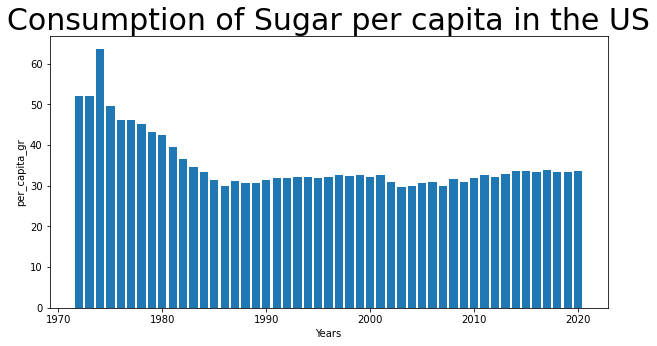

In [128]:
plt.bar(df_USA.Market_Year, df_USA.per_capita_gr, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('per_capita_gr')
plt.title('Consumption of Sugar per capita in the US', size = 30)
plt.show()

## subset India

In [136]:
df_IN = df_merge[df_merge['Country_Name'] == 'India']
df_IN.head(50)

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams,Country Name,Country Code,Years,population,per_capita_gr
3774,"Sugar, Centrifugal",IN,India,1960,Human Dom. Consumption,(1000 MT),2269,2.269000e+09,NaN,NaN,NaN,NaN,NaN
3775,"Sugar, Centrifugal",IN,India,1961,Human Dom. Consumption,(1000 MT),2513,2.513000e+09,NaN,NaN,NaN,NaN,NaN
3776,"Sugar, Centrifugal",IN,India,1962,Human Dom. Consumption,(1000 MT),2503,2.503000e+09,NaN,NaN,NaN,NaN,NaN
3777,"Sugar, Centrifugal",IN,India,1963,Human Dom. Consumption,(1000 MT),2833,2.833000e+09,NaN,NaN,NaN,NaN,NaN
3778,"Sugar, Centrifugal",IN,India,1964,Human Dom. Consumption,(1000 MT),2595,2.595000e+09,NaN,NaN,NaN,NaN,NaN
3779,"Sugar, Centrifugal",IN,India,1965,Human Dom. Consumption,(1000 MT),2646,2.646000e+09,NaN,NaN,NaN,NaN,NaN
3780,"Sugar, Centrifugal",IN,India,1966,Human Dom. Consumption,(1000 MT),2958,2.958000e+09,NaN,NaN,NaN,NaN,NaN
3781,"Sugar, Centrifugal",IN,India,1967,Human Dom. Consumption,(1000 MT),3175,3.175000e+09,NaN,NaN,NaN,NaN,NaN
3782,"Sugar, Centrifugal",IN,India,1968,Human Dom. Consumption,(1000 MT),2792,2.792000e+09,NaN,NaN,NaN,NaN,NaN
3783,"Sugar, Centrifugal",IN,India,1969,Human Dom. Consumption,(1000 MT),2869,2.869000e+09,NaN,NaN,NaN,NaN,NaN


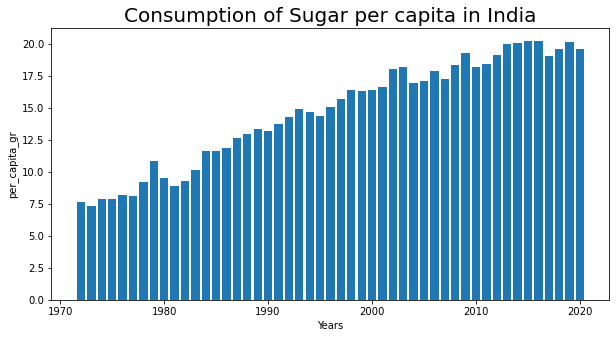

In [127]:
plt.bar(df_IN.Market_Year, df_IN.per_capita_gr, linewidth=2)
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('per_capita_gr')
plt.title('Consumption of Sugar per capita in India', size = 20)
plt.show()

## let's compare the sugar consumption / sugar consumption per capita / population

In [ ]:
# consumption per capita
df_IN = df_merge[df_merge['Country_Name'] == 'India']
df_IN.head()

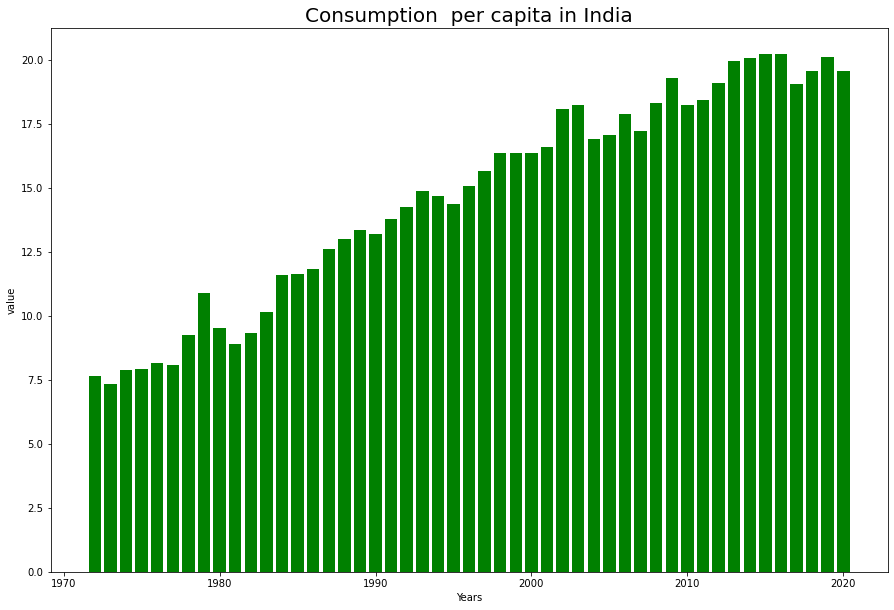

In [129]:
plt.bar(df_IN.Market_Year, df_IN.per_capita_gr, color = 'green',  linewidth=2)
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('value')
plt.title('Consumption  per capita in India', size = 20)
plt.show()

In [130]:
# consumption in India
df_sugar_IN = df_sugar[df_sugar['Country_Name'] == 'India']
df_sugar_IN.head(1)

,Commodity_Description,Country_Code,Country_Name,Market_Year,Attribute_Description,Unit_Description,Value,Value_grams
3774,"Sugar, Centrifugal",IN,India,1960,Human Dom. Consumption,(1000 MT),2269,2.269000e+09


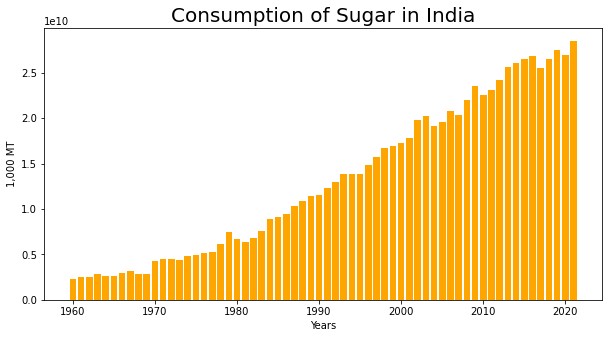

In [133]:
plt.bar(df_sugar_IN.Market_Year, df_sugar_IN.Value_grams, linewidth=2, color = 'orange')
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in India', size = 20)
plt.show()

In [134]:
# population in India
df_pop_IN = df_pop[df_pop['Country Name'] == 'India']
df_pop_IN.head(1)

,Country Name,Country Code,Years,population
4704,India,IND,2020,1.380004e+09


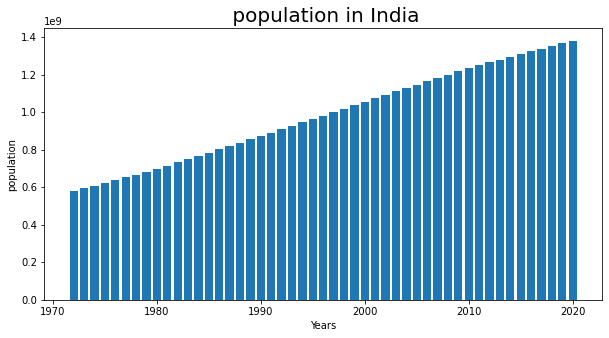

In [135]:
plt.bar(df_pop_IN.Years, df_pop_IN.population, linewidth=2)
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('population')
plt.title(' population in India', size = 20)
plt.show()

## plot all 3

In [ ]:
fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (15,5))
fig.suptitle('Sugar consumption in India', size = 20)
#ax1.set_title('USA')
#ax1.bar(df_IN.Calendar_Year, df_IN.per_capita)

ax2.set_title('India')
ax2.bar(df_sugar_IN.Market_Year, df_sugar_IN.Value, color = 'green')

ax3.set_title('population')
ax3.bar(df_pop_IN.Years, df_pop_IN.population, color = 'orange')


In [ ]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, sharey = True, figsize = (15,15))
fig.suptitle('Sugar consumption USA vs India', size = 30)
ax1.set_title('USA')
ax1.bar(df_sugar_cons_USA.Market_Year, df_sugar_cons_USA.Value)

ax2.set_title('India')
ax2.bar(df_sugar_cons_IN.Market_Year, df_sugar_cons_IN.Value, color = 'green')

ax3.set_title('China')
ax3.bar(df_sugar_cons_China.Market_Year, df_sugar_cons_China.Value, color = 'orange')

ax4.set_title('EU')
ax4.bar(df_sugar_cons_EU.Market_Year, df_sugar_cons_EU.Value, color = 'violet')